In [1]:
import os
import pymeshlab
from vedo import Mesh, Plotter, Volume
import numpy as np

In [2]:
# Specify the input folder containing OBJ files
input_folder = "/Users/minoue/Desktop/Raphy_skull"

# Specify the output STL file
output_obj_file = "/Users/minoue/Desktop/Raphy_skull/single_mesh.obj"

# Specigy the isotropic volume voxel size and output image stack 
voxel = 7 # This is in the same unit as your mesh
output_tiff_file = "/Users/minoue/Desktop/Raphy_skull/voxelized_img.tiff"

In [3]:
def flatten_meshes(input_folder):
    # Initialize a MeshSet object
    ms = pymeshlab.MeshSet()

    # Iterate through each input OBJ file
    for obj_file in os.listdir(input_folder):
        if obj_file.endswith(".obj"):
            # Construct the full path to the input OBJ file
            obj_path = os.path.join(input_folder, obj_file)

            # Load the OBJ file into the MeshSet
            ms.load_new_mesh(obj_path)

    # Merge all loaded meshes into one
    ms.generate_by_merging_visible_meshes()
    return ms

In [4]:
if __name__ == "__main__":

    # Create the MeshSet by flattening all OBJ files
    flattened_mesh = flatten_meshes(input_folder)

    # Perform Laplacian smoothing
    flattened_mesh.apply_filter('apply_coord_laplacian_smoothing')

    # Decimate the mesh to the target face number (e.g., 1,000,000)
    flattened_mesh.apply_filter("meshing_decimation_quadric_edge_collapse", targetfacenum=1000000)

    # Save the merged and processed mesh as a single STL file
    flattened_mesh.save_current_mesh(output_obj_file, save_face_color=False)

    print(f"Processed mesh saved as '{output_obj_file}'")

Processed mesh saved as '/Users/minoue/Desktop/Raphy_skull/single_mesh.obj'


<Volume(0x7fcdb724c600) at 0x7fcdcb643580>
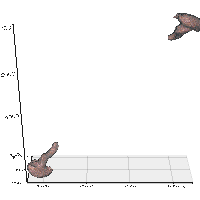

In [5]:
# Binarize and export as tiff
# Set export voxel size
surf = Mesh(output_obj_file)
vol = surf.binarize(spacing=(voxel,voxel,voxel))
vol.write(output_tiff_file)